In [1]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


     

In [3]:
# resize all the images to this


IMAGE_SIZE=[224,224]

test_path='ML PROJECT/Deep Learning Project  Heroku(Car Brand Class)/Test'
train_path='ML PROJECT/Deep Learning Project  Heroku(Car Brand Class)/Train'

In [4]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


     

In [5]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False


     

In [6]:

  # useful for getting number of output classes
folders = glob('Train/*')


   

In [7]:
folders

['Train\\audi', 'Train\\lamborghini', 'Train\\mercedes']

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yokau\AppData\Local\Temp\ipykernel_8900\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 7s 4s/step - loss: 4.3671 - accuracy: 0.3281 - val_loss: 14.1171 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 5s 3s/step - loss: 7.9398 - accuracy: 0.2969 - val_loss: 3.8726 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 2.4263 - accuracy: 0.4219 - val_loss: 3.6753 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 5s 3s/step - loss: 4.2141 - accuracy: 0.2969 - val_loss: 3.7348 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 5s 3s/step - loss: 2.3636 - accuracy: 0.4062 - val_loss: 1.6868 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 4s 3s/step - loss: 2.2185 - accuracy: 0.4375 - val_loss: 2.0466 - val_accuracy: 0.4138
Epoch 7/50
2/2 [==============================] - 4s 3s/step - loss: 1.5770 - accuracy: 0.4531 - val_loss: 1.2259 - val_accuracy: 0.5690
Epoch 8/50
2/2 [========================

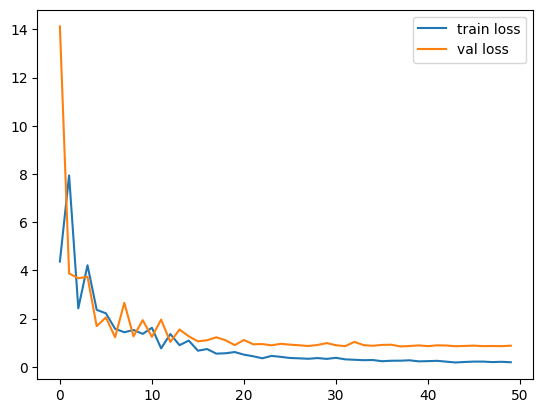

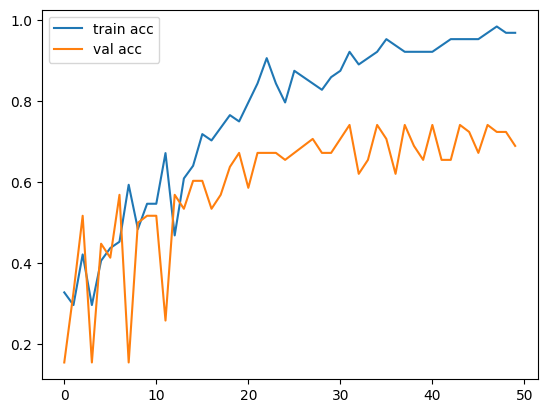

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

2/2 [==============================] - 2s 812ms/step


In [19]:

y_pred

array([[1.06485508e-01, 6.63271785e-01, 2.30242640e-01],
       [2.06996817e-02, 2.91270852e-01, 6.88029468e-01],
       [2.47507796e-01, 8.93723741e-02, 6.63119853e-01],
       [9.23255993e-06, 4.96740802e-04, 9.99493957e-01],
       [1.69383083e-02, 4.14062649e-01, 5.68999112e-01],
       [2.00673580e-01, 7.41383255e-01, 5.79430833e-02],
       [3.49911422e-01, 3.20038676e-01, 3.30049843e-01],
       [1.31911978e-01, 3.92607421e-01, 4.75480616e-01],
       [3.05058658e-02, 5.39916813e-01, 4.29577291e-01],
       [6.62120357e-02, 3.94548088e-01, 5.39239824e-01],
       [5.49358875e-03, 9.76922154e-01, 1.75842382e-02],
       [1.78448204e-02, 9.12313461e-01, 6.98417723e-02],
       [3.79492994e-03, 9.17543232e-01, 7.86617994e-02],
       [1.44035397e-02, 6.82800589e-03, 9.78768408e-01],
       [1.45642960e-03, 9.87878084e-01, 1.06656086e-02],
       [1.51284665e-01, 4.22744840e-01, 4.25970495e-01],
       [7.89447874e-03, 9.01019454e-01, 9.10860449e-02],
       [1.08228944e-01, 6.46723

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [24]:
#img_data

In [25]:
img=image.load_img('Test/lamborghini/11.jpg',target_size=(224,224))

In [26]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 1s 565ms/step


array([[0.00333116, 0.03328956, 0.9633793 ]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 67ms/step


In [32]:

a==1

array([False])